In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
l_start = 0
r_end = 26
step_base = 0.5
step_sq = 0.3
h = 0.6
step_ravnomern = 0.14

In [3]:
def func(x:np.array,h:float=h):
    return (np.sin(x*h))

In [4]:
x_base: np.array = np.arange(start=l_start,stop=r_end,step=step_base)
y_base = func(x_base)

In [5]:
x1 = np.arange(start=l_start,stop=r_end,step = step_ravnomern)
y1 = func(x1)

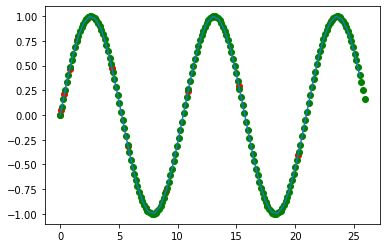

In [6]:
x = np.arange(0,np.sqrt(r_end),step=step_sq)**2
# x = np.arange(start=l_start,stop=r_end,step=[step])
y = func(x)

plt.scatter(x,y,c='r')
plt.plot(x_base,y_base,'-',marker='',markersize=6)
plt.scatter(x1,y1,c='g')

In [7]:
n = shape = x1.shape[0]
A = np.zeros(shape=shape)
B = np.zeros(shape=shape)
C = np.zeros(shape=shape)
F = np.zeros(shape=shape)
D = np.zeros(shape=shape)
alpha = np.zeros(shape=shape)
beta = np.zeros(shape=shape)
a = np.zeros(shape=shape)
b = np.zeros(shape=shape)
c = np.zeros(shape=shape)

In [8]:
# B[0], C[0] = 1, 1
# A[1:-1], B[1:-1], C[1:-1] = 1, 4, 1
# A[-1], B[-1] = 1, 1
# D = x[1:] - x[0:-1]
# F[0] = 2/D[0] * (y[1] - y[0])
# F[1:-1] = 3/D[1:-1]* (y[2:-1]-y[0:-3])
# F[-1] = 2/D[-1] * (y[-2] - y[-3])


In [9]:
# alpha[1] = -C[0] / B[0]
# beta [1] = F[0]/B[0]
# for i in range(2,shape):
#     alpha[i] = -C[i]/B[i]/(1+A[i]/B[i]*alpha[i-1])
#     beta[i] = (F[i-1]-A[i]*beta[i-1])/(A[i]*alpha[i-1]+B[i])
#

In [10]:
# a[-1] = (F[-1]-A[-1]*beta[-1])/(A[-1]*alpha[n-1]+B[-1])
# for i in range(n-2,-1,-1):
#     a[i] = alpha[i+1] * a[i+1] +beta[i+1]
# b[0] = 2/D[0]**2 * (3*y[1]-3*y[0]-2*a[0]*D[0]-a[1]*D[0])
# b[1:] = 2/D[0:-1]**2 * (3*y[1:-1] - 3*y[0:-2] - 2*a[1:]*D[0:-1] - a[0:-1]*D[0:-1] )
# c[:-1] =6/D[0:-1]**6 * (-2*y[1:-1] + 2*y[0:-2] + a[:-1]*D[0:-1] + a[1:]*D[0:-1] )
#

In [11]:
# N_inter = 100
# y_res = np.zeros(N_inter*shape)
# x_res = np.zeros(N_inter*shape)
#
#
# # c[2] = 0
# # c[alpha.shape[0]-1] = 0
# for k in range(shape-2):
#     dx = np.linspace(start=0,stop=x[k+1]-x[k],num=N_inter)
#     yk = y[k] + a[k]*dx + b[k] * (dx**2)/2 + (c[k]*dx**3)/6
#     y_res[k*N_inter:N_inter*(k+1)] = yk
#     x_res[k*N_inter:N_inter*(k+1)] = dx + x[k]
# y_res = y_res[N_inter:-N_inter]
# x_res = x_res[N_inter:-N_inter]
#

In [12]:
# plt.plot(dx,yk)
#

In [13]:
# plt.plot(y)
#

In [14]:
# plt.figure(figsize=(12,8))
# plt.scatter(x,y)
# plt.plot(x_res,y_res,'--')
# # plt.savefig('interpolate')ravn
#

In [15]:
# y_s=[0]*(n-1)
# for i in range(0,n-1):
#     xs=np.linspace(0,D[i],100)
#     y_s[i]=y[i]+a[i]*xs+b[i]*(xs**2)/2+c[i]*(xs**3)/6
#     plt.plot(xs+x[i], y_s[i])
# print(x)
# print(y)
# print(F)
# print(alpha)
# print(beta)
# print(a)
# print(b)
# print(c)

In [16]:
d = x1[1] - x1[0]
B[0], C[0] = 1, 1
A[1:-1], B[1:-1], C[1:-1] = 1, 4, 1
A[-1], B[-1] = 1, 1
F[0] = 2/d * (y1[1] + y1[0])
F[1:-1] = 3/d * (y1[2:n]-y1[0:n-2])
F[-1] = 2/d * (y1[-1] - y1[-2])

# for i in range(1,n-1):
#     F[i]=(y1[i+1]-y1[i-1])*3/d
# F[0]=2*(y1[1]-y1[0])/d
# # F[n]=(2*(y1[n-2]-y1[n-3])/d)
# np.add(F,(2*(y1[n-2]-y1[n-3])/d))

In [17]:
alpha[1] = -C[0] / B[0]
beta [1] = F[0]/B[0]
for i in range(2,n):
    alpha[i] = -C[i]/B[i] * 1/(1+A[i]/B[i]*alpha[i-1])
    beta[i] = (F[i-1]-A[i]*beta[i-1])/(A[i]*alpha[i-1]+B[i])

In [18]:
a[-1] = (F[-1]-A[-1]*beta[-1])/(A[-1]*alpha[n-1]+B[-1]) #Find a[n-1]
for i in range(n-2,-1,-1):
    a[i] = alpha[i+1] * a[i+1] +beta[i+1]
# a[-1] = 2*y1[-1]/d - 2*y1[-2]/d - a[-1]

# b[0]=2*(3*y1[1]-3*y1[0]-2*a[0]*d-a[1]*d)/(d**2)
# for i in range(1,n-1):
#     b[i]=2*(2*a[i]*d-3*y1[i]+3*y1[i-1]+a[i-1]*d)/(d**2)
# for i in range (0,n-1):
    # c[i]=6*(a[i+1]*d+a[i]*d-2*y1[i+1]+2*y1[i])/(d**3)

# b[0]=2/d**2 *(3*y1[1]-3*y1[0]-2*a[0]*d-a[1]*d)
# b[1:] = 2/d**2 * (-3*y1[1:-1]+3*y1[0:-2] + 2*d*a[1:] + d*a[0:-1])
# b[-1] = b[-2]
# print(b[-1])
# b[-1] = 2/d**2 * (2*d*a[-1]+d*a[-2] - 3*y1[-1] +3*y1[-2])
# print(b[-1])
# b[-1] = 2/d * (a[-2] - a[-3]) - b[-2]
# print(b[-1])
# print(b[-2])
#
#Верный вариант:
# b[:-1] = 2/d**2 * (3*y1[1:-1] - 3*y1[0:-2] -2*d*a[0:-1] - d*a[1:])
# b[-1] = 2/d**2 * (2*d*a[-1]+d*a[-2] - 3*y1[-1] +3*y1[-2])

# Верный вариант
# c[:n-1] =6/d**3 * (-2*y1[1:n] + 2*y1[0:n-1] + a[:n-1]*d + a[1:n]*d )

# c[-1] = 0
# b[:] = 2/d**2 * (3*y1[1:] - 3*y1[0:-1] -2*d*a[0:-1] - d*a[1:])
# print(b[-1])
# print(b[-2])
# b[-1] = 2/d**2 * (2*d*a[-1]+d*a[-2] - 3*y1[-1] +3*y1[-2])
#
c[:n-1] =6/d**3 * (-2*y1[1:n] + 2*y1[0:n-1] + a[:-1]*d + a[1:]*d )
c[-1] = 0

In [19]:
N_inter = 1000
y_res = np.zeros(N_inter*(shape-2))
x_res = np.zeros(N_inter*(shape-2))

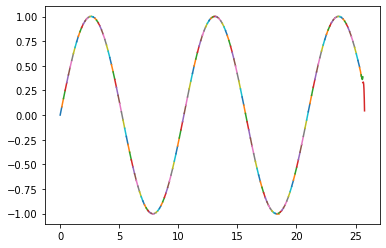

In [20]:
# c[2] = 0
# c[alpha.shape[0]-1] = 0
for k in range(shape-2):
    dx = np.linspace(start=0,stop=d,num=N_inter)
    yk = y1[k] + a[k]*dx + b[k] * (dx**2)/2 + (c[k]*dx**3)/6
    y_res[k*N_inter:N_inter*(k+1)] = yk
    x_res[k*N_inter:N_inter*(k+1)] = dx + x1[k]
    plt.plot(dx+x1[k],yk)

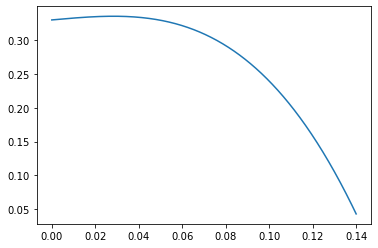

In [21]:
plt.plot(dx,yk)

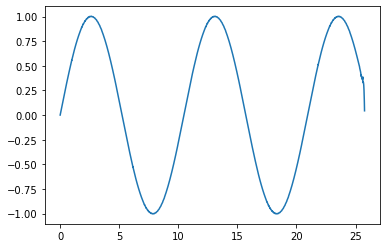

In [22]:
plt.plot(x_res,y_res)

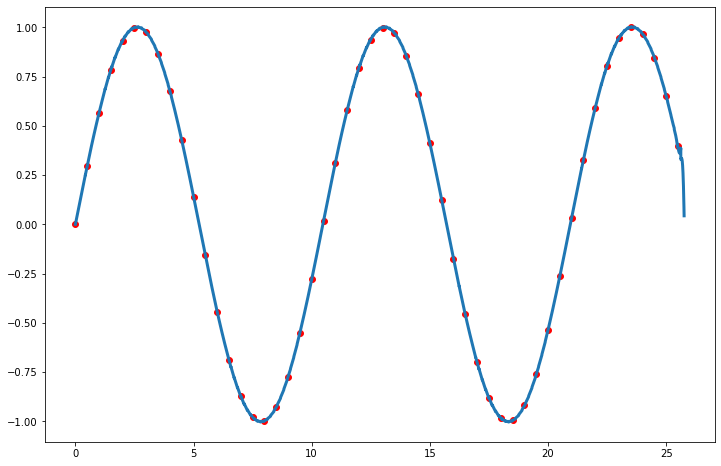

In [23]:
plt.figure(figsize=(12,8))
# plt.scatter(x1,y1)
plt.plot(x_res,y_res,'-',linewidth=3)
# plt.plot(x_base,y_base,'-',marker='.',markersize=6)
plt.scatter(x_base,y_base,marker='.',s=140,c='r')

# plt.savefig('interpolate')